# Dimensionality Reduction using an Autoencoder in Python 
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [4]:
# Create dataset artificially for learning purpose (sklearn blob function)

X, y = make_blobs(n_features=50, centers=20, n_samples=20000,
                  cluster_std=0.2, center_box=[-1,1],random_state=17)

# n_features - dimensionality of dataset to transform to 2D space
# centers - 20 clusters
#center_box - constraint our census within certain reasonable region

In [5]:
#looking at first item of X 
X[0] # 50 dimensional vector

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [6]:
#Train test split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,
                                                random_state=17)

#scale the data
scaler = MinMaxScaler() #Scale each feature in our dataset, convert from its existing value to value [0,1]

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<a id='task3'></a>
# Task 3: Baseline Model

In [7]:
# PCA to create a model as a baseline to check the performance

pca = PCA(n_components=2)
pca.fit(X_train)

res_pca = pca.transform(X_test)

In [8]:
res_pca.shape # dimension reduction - find features with highest variance

(2000, 2)

Text(0.5, 1.0, 'PCA Results')

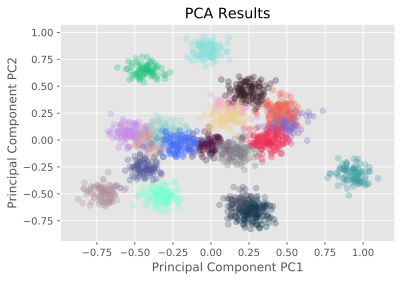

In [9]:
unique_labels = np.unique(y_test)

for index,unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_label] #index an array based on values that exist in another array
    
    plt.scatter(X_data[:,0],X_data[:,1], alpha = 0.3,
               c=cols[index])

plt.xlabel('Principal Component PC1')
plt.ylabel('Principal Component PC2')
plt.title('PCA Results')

A lot of clusters overlap here. Less separability for higher dimensional data with PCA

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training
![title](Images/ae_viz.pdf)

In [10]:
#Build NN with specific AE architecture 

autoencoder = MLPRegressor(alpha=1e-15,
                           hidden_layer_sizes=(50,100,50,2,50,100,50),
                           random_state=1,
                           max_iter=20000) #multilayer perceptrons , using regressor as no classfication problem here
# here encode state - 50,100,50 , 2 Code Block, decode - 50,100,50
autoencoder.fit(X_train,X_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=20000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [11]:
# we have weights, non-linearity and bias values as well
W = autoencoder.coefs_ #weights relevant we are looking for
biases = autoencoder.intercepts_ #biases accordingly



In [12]:
for w in W:
    print(w.shape) # presents our layers (encode decode code) with dimension size

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [13]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [14]:
#encode function

def encode(encoder_weights,encoder_biases, data):
    res_ae = data # result is assigned to data
    for index, (w,b) in enumerate(zip(encoder_weights,encoder_biases)):
        
        ##res_ae = res_ae@w+b #@ means dot product here in python
        # problem is here we didn't take into account non-linearity at each layer
        ##res_ae = np.maximum(0,res_ae@w+b) 
        # so in final layer before going to latent space, we fon't want to go to non-linearity
        # so we add if statement we dont need above equation
        
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0,res_ae@w+b) 
    # so we coonverted 50 dimensional data into 2 dimensional data
    return res_ae

res_ae = encode(encoder_weights,encoder_biases,X_test)

In [15]:
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'AutoEncoder Results')

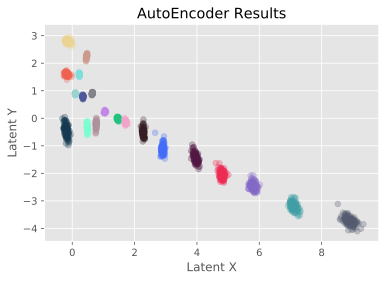

In [16]:
# visualie dataset
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    
    plt.scatter(latent_space[:,0],latent_space[0:,1], alpha=0.3,
               c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('AutoEncoder Results')

Results are well preneted using AE rather than PCA and separability is done well without these clusters.

Clusters are much stronger i.e. independent and work quite well and takes 50 dimensions and compress them and then also shows relevance of each cluster properly, no overlapping, no points in wrong cluster.

Clustering algorithms - check how well the points are suited to cluster it is assigned to and its neigbouring points as well.

In [17]:
silhouette_score(X_test,y_test) #how well suited these points are to their clusters

0.6100948647899368

Silhoutte_score from [-1,1] where -1 means poorly located to +1 is perfect clustering so here it is closer to 1 so better clustering for data points

In [18]:
silhouette_score(res_pca,y_test) #PCA score, poorly than above as there are overlaps

0.36785711858134756

In [19]:
silhouette_score(res_ae,y_test) #AE score, better and improved than PCA, better separability and correct points assigned to their clusters

0.8074659601928073

In terms of clustering, AE had a better representation of data even than original test dataset